In [40]:
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

plt.rcParams.update({'font.size': 14})
pd.set_option('display.float_format', lambda x: '%.2f' % x)
path = '../../../../k6/results/ssrh/'

def convert_to_MiB(value):
    if 'GiB' in value:
        return str(int(float(value.replace('GiB', '')) * 1024))
    if 'MiB' in value:
        return value.replace('MiB', '')
    if 'B' in value:
        return str(int(float(value.replace('B', '')) / 1024))
    return value

def detect_outliers(df, features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[features])
    return outliers == 1

def graph_row(plot_func, dataset, features, height=4, width=20):
    cols = len(features)
    fig, axes = plt.subplots(ncols=cols, figsize=(width, height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)
    for x, f in enumerate(features):
        plot_func(dataset, f, axes[x], idx=x)
    return plt

services = ["monolith", "cdn", "discovery", "teasers", "recommendations"]

# Test: 10.000 VUs

In [41]:
dirty_df = pd.read_csv(f'{path}10000/metrics.csv', sep=',')

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

mask = detect_outliers(dirty_df, [*duration, *throughput])
df_10000 = dirty_df[mask].copy().reset_index(drop=True)

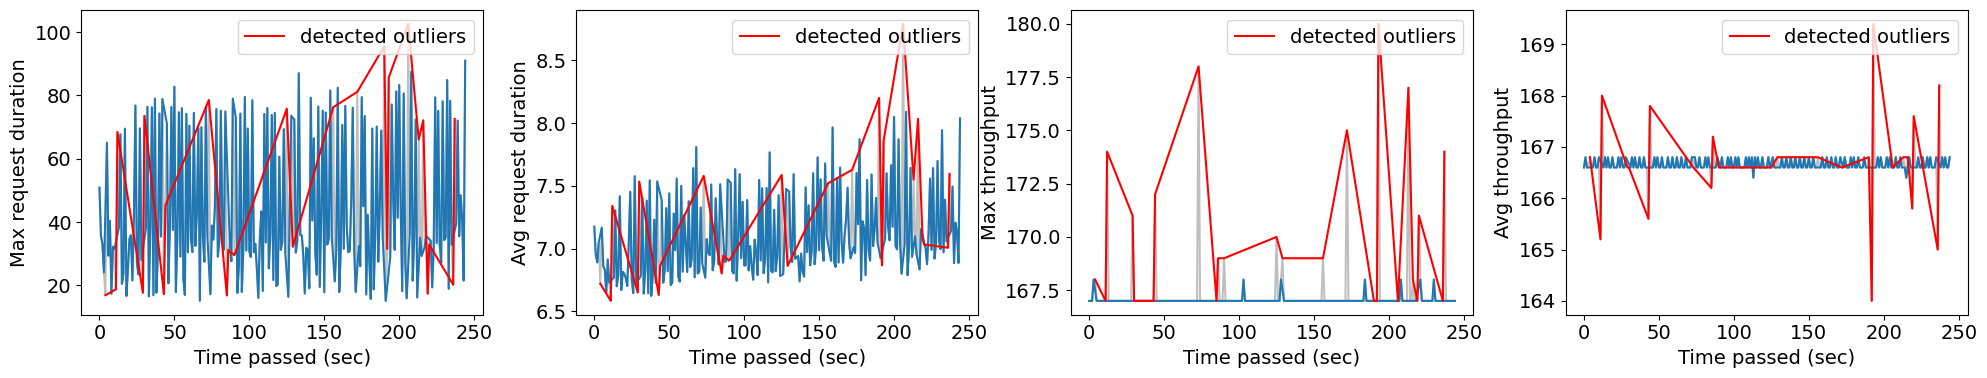

In [42]:

ylabel = ['Max request duration', 'Avg request duration', 'Max throughput', 'Avg throughput']

def plot_outliers(_df, f, loc, idx):
    loc.plot(_df[f], color='gray', alpha=0.5)
    loc.plot(_df[f][mask])
    loc.plot(_df[f][~mask], label='detected outliers', color='red')

    loc.set_ylabel(ylabel[idx]) 
    loc.set_xlabel('Time passed (sec)') 
    loc.legend(loc="upper right")

graph_row(plot_outliers, dirty_df, ['duration_max','duration_mean','throughput_max','throughput_mean',])
plt.tight_layout()
plt.show()

# Test: 5.000 VUs

In [43]:
dirty_df = pd.read_csv(f'{path}5000/metrics.csv', sep=',')

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

mask = detect_outliers(dirty_df, [*duration, *throughput])
df_5000 = dirty_df[mask].copy().reset_index(drop=True)

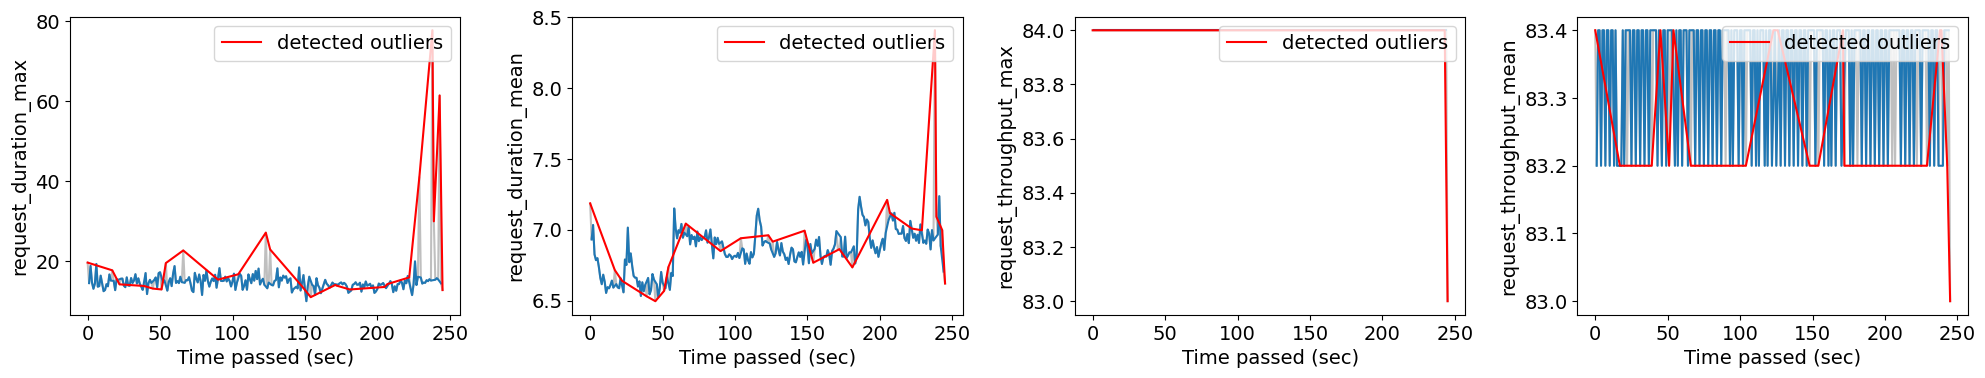

In [44]:
def plot_outliers(_df, f, loc, idx):
    loc.plot(_df[f], color='gray', alpha=0.5)
    loc.plot(_df[f][mask])
    loc.plot(_df[f][~mask], label='detected outliers', color='red')

    loc.set_ylabel(f'request_{f}') 
    loc.set_xlabel('Time passed (sec)') 
    loc.legend(loc="upper right")

graph_row(plot_outliers, dirty_df, ['duration_max','duration_mean','throughput_max','throughput_mean',])
plt.tight_layout()
plt.show()

# CPU Usage    5.000 vs 10.000

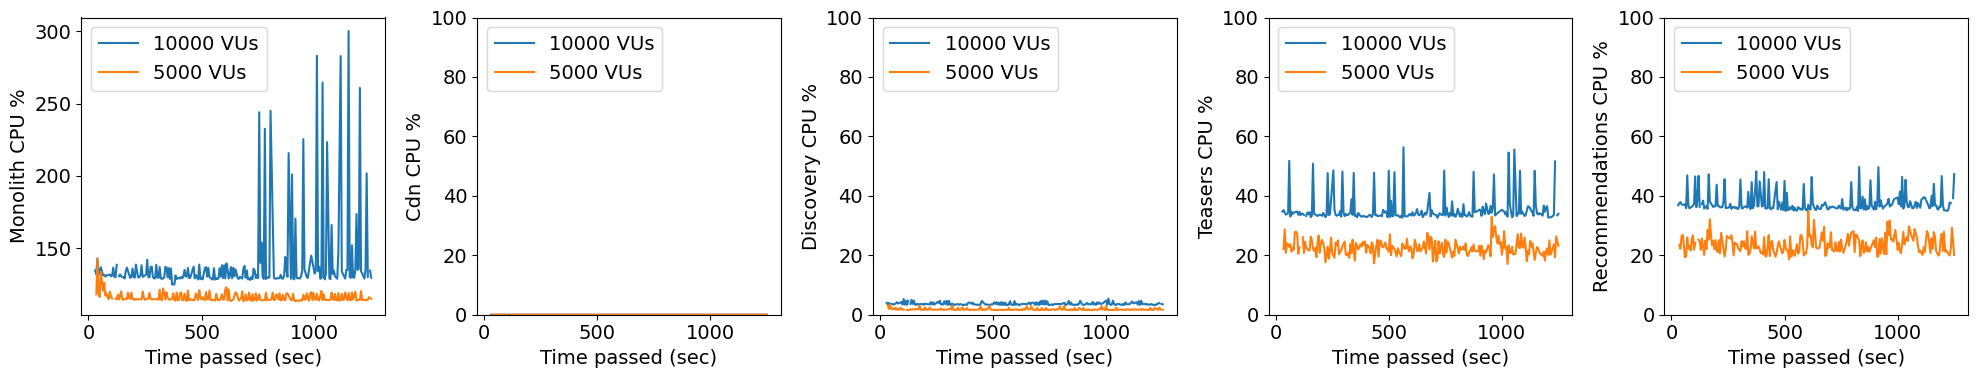

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 4))

# Memory usage line graph
for i, s in enumerate(services):
    axes[i].plot(df_10000['timestamp'], df_10000[f'{s}_cpu_percent'], label=f'10000 VUs')
    axes[i].plot(df_5000['timestamp'], df_5000[f'{s}_cpu_percent'], label=f'5000 VUs')

    axes[i].set_xlabel('Time passed (sec)')
    axes[i].set_ylabel(f'{s.capitalize()} CPU %')
    axes[i].legend(loc="upper left")
    if i != 0:
        axes[i].set_ylim(bottom=0,top=100)

plt.tight_layout()
plt.show()


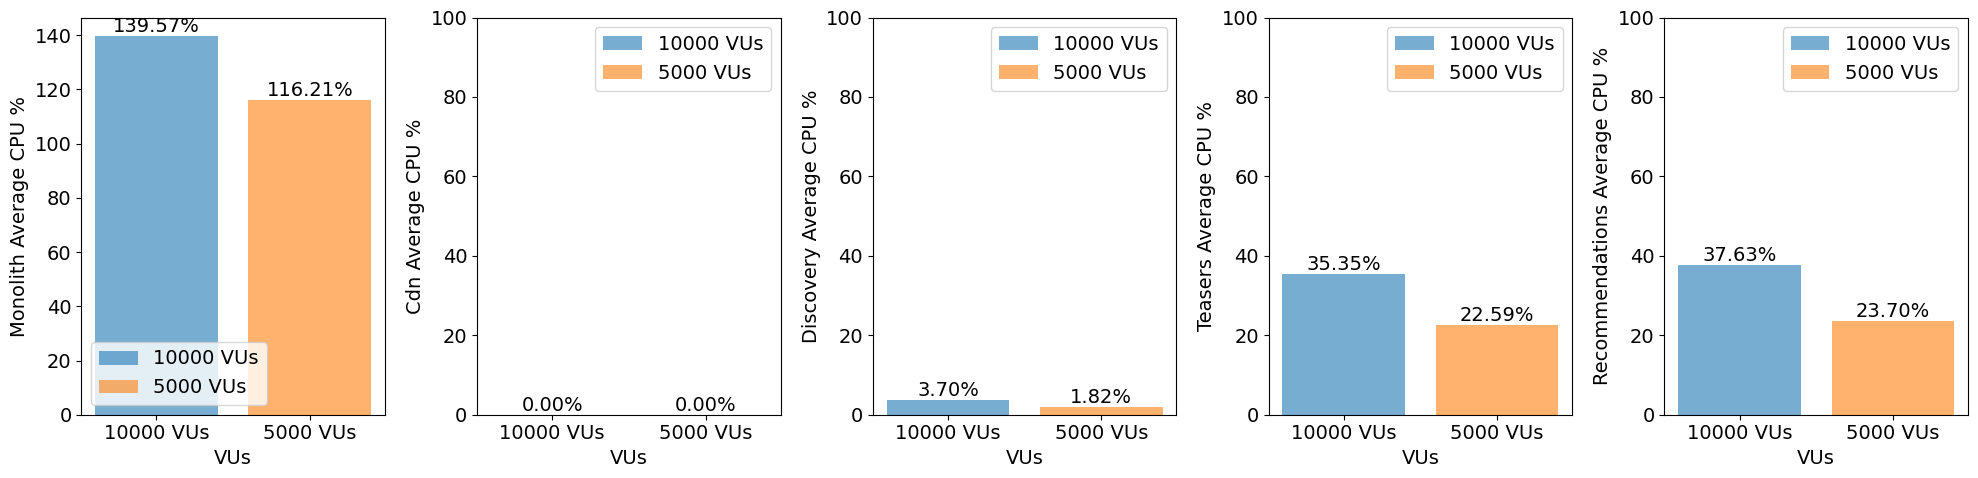

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 5))

for i, s in enumerate(services):
    bars_10000 = axes[i].bar('10000 VUs', df_10000[f'{s}_cpu_percent'].mean(), label=f'10000 VUs', alpha=0.6)
    bars_5000 = axes[i].bar('5000 VUs', df_5000[f'{s}_cpu_percent'].mean(), label=f'5000 VUs', alpha=0.6)

    axes[i].set_xlabel('VUs')
    axes[i].set_ylabel(f'{s.capitalize()} Average CPU %')
    axes[i].legend()
    if(i != 0):
        axes[i].set_ylim(bottom=0, top=100)

    for bar in bars_10000:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')
    
    for bar in bars_5000:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Memory usage 10.000 vs 5.000

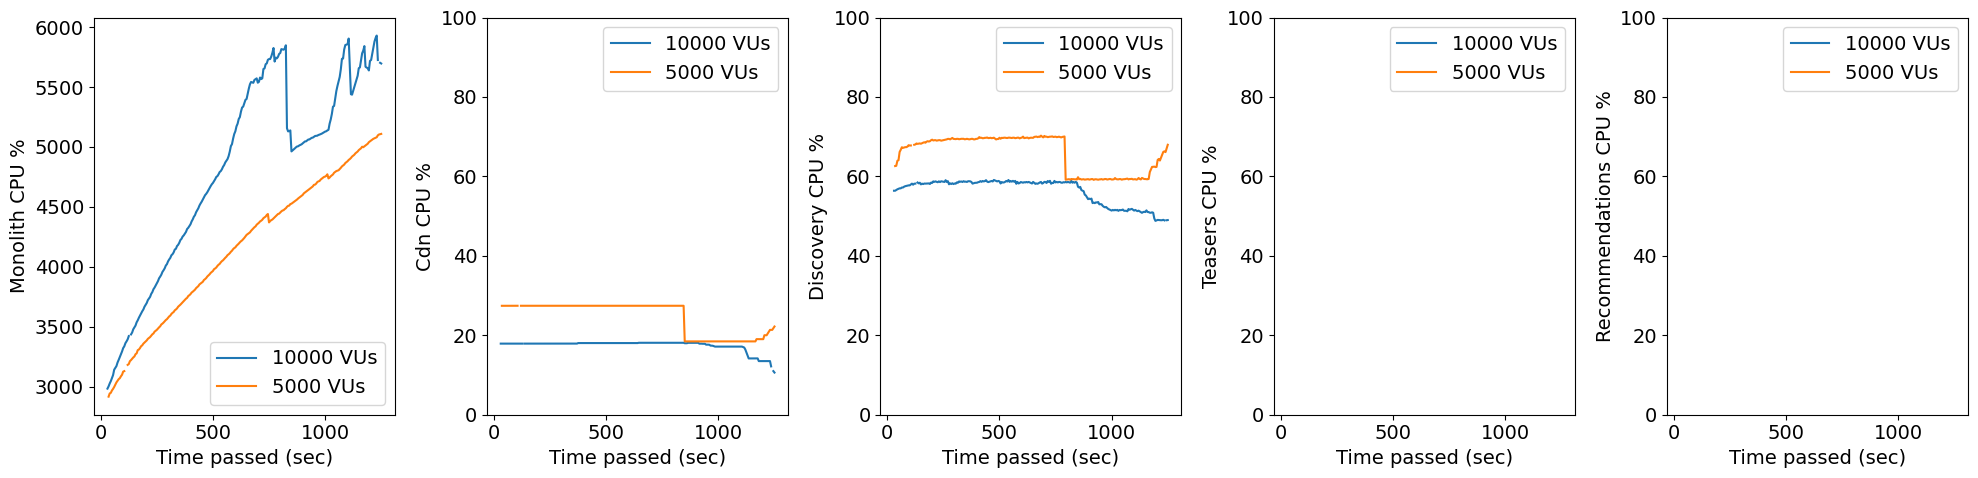

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 5))

# Memory usage line graph
for i, s in enumerate(services):
    axes[i].plot(df_10000['timestamp'], df_10000[f'{s}_mem_usage'], label=f'10000 VUs')
    axes[i].plot(df_5000['timestamp'], df_5000[f'{s}_mem_usage'], label=f'5000 VUs')

    axes[i].set_xlabel('Time passed (sec)')
    axes[i].set_ylabel(f'{s.capitalize()} CPU %')
    axes[i].legend()
    if i != 0:
        axes[i].set_ylim(bottom=0,top=100)
plt.tight_layout()
plt.show()


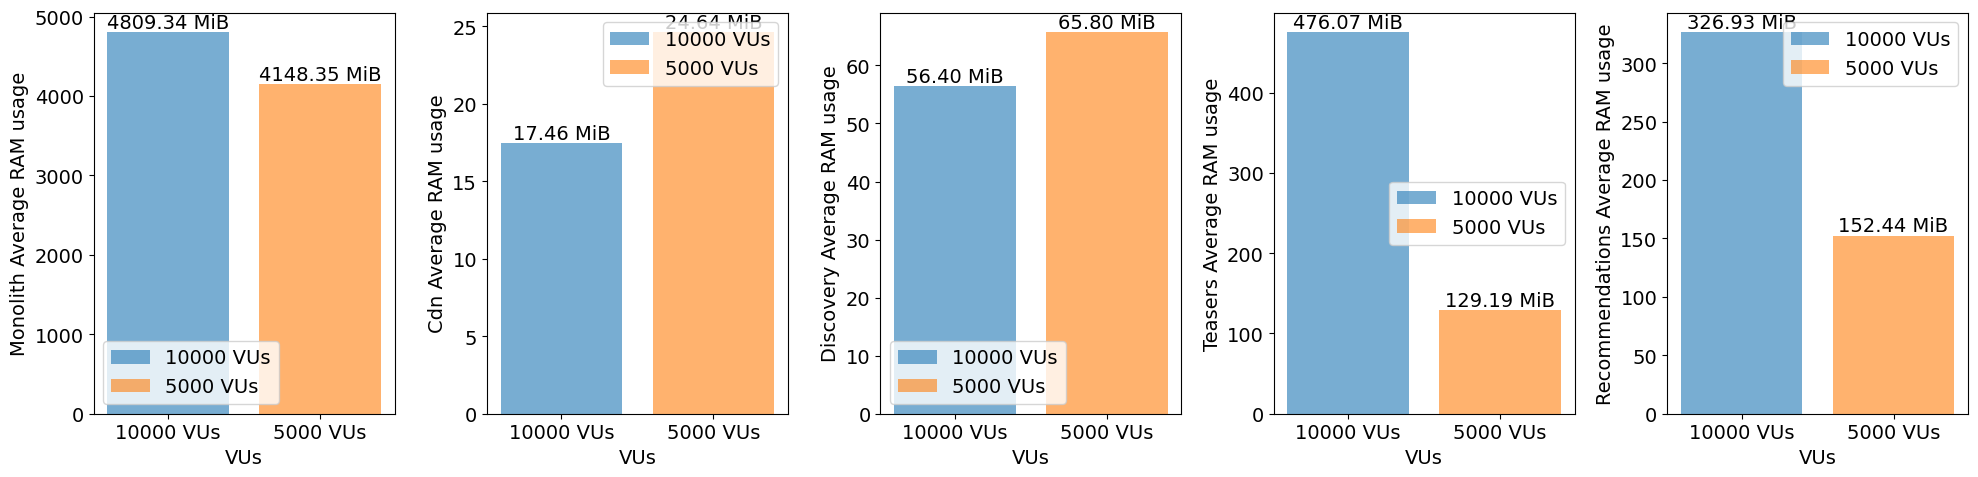

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 5))

for i, s in enumerate(services):
    bars_10000 = axes[i].bar('10000 VUs', df_10000[f'{s}_mem_usage'].mean(), label=f'10000 VUs', alpha=0.6)
    bars_5000 = axes[i].bar('5000 VUs', df_5000[f'{s}_mem_usage'].mean(), label=f'5000 VUs', alpha=0.6)

    axes[i].set_xlabel('VUs')
    axes[i].set_ylabel(f'{s.capitalize()} Average RAM usage')
    axes[i].legend()

    for bar in bars_10000:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f} MiB', ha='center', va='bottom')
    
    for bar in bars_5000:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f} MiB', ha='center', va='bottom')


plt.tight_layout()
plt.show()